> ### Outline

- 시계열 개념
    - 종단면 데이터, 횡단면 데이터
    - 단변량 시계열, 다변량 시계열
    - 시간의존성, 계절성, 추세,  자기상관성
    - 추세 요인, 계절 요인, 순환요인, 불규칙 요인
- 시계열 전처리
    - 결측치 처리-보간법
    - 이상치 탐지
    - 평활화(smoothing)-이동평균
    - 요소분해
- 정상성
    - 정상성의 정의
    - 강한 정상성과 약한 정상성
    - 단위근의 시계열적 의미
    - 단위근 검정
    - 확정적 추세와 확률적 추세
    - 정상성 확보 방법

> ## 1. 시계열 데이터

> ### 1-1. 시계열 데이터란?  

- 순차적인 시간의 흐름에 따라 수집된 데이터  
- 관측치끼리의 상관관계가 존재(자기 상관성) -> 순서가 중요한 시퀀스 데이터  
- 단어의 순서가 중요한 자연어 관련에도 동일한 시계열 개념이 적용될 수 있음!

> 📈 시계열 데이터를 다룰 때의 핵심 질문:  
과거 데이터가 미래에 어떤 영향을 미치는가?

- 종단면(Time-Series) 데이터  
동일한 개체에 대해, 시간 간격으로 수집  
예: A 지방의 기후, B 주식의 주가  
    - 특징  
    1. 시간 의존성  
    2. 개체 또는 단위 추적  
    3. 패턴 및 동향 분석  
    4. 효과 및 원인 분석

- 횡단면(Cross-Sectional) 데이터  
몇 가지 주제에 대해, 같은 시점에서 수집  
예: 같은 시점에서, A,B,C,D,E 지방의 기후  
    - 특징  
    1. 시간 의존성이 없음(독립적인 데이터 포인트)  
    2. 다중 변수
    3. 비교 분석  
    4. 상관관계 분석

- 단변량 시계열  
시간에 따라 연속적으로 측정된 **단일 변수**로 이루어짐  
예: yfinance에서 주가 자체를 가지고 트렌드 파악

- 다변량 시계열  
둘 이상의 변수로 이루어진 시계열 데이터  
변수 간 상호 작용 및 영향력 판단  
예: yfinance 주가 + 국채 금리 + 금 ETF 등을 종합할 때

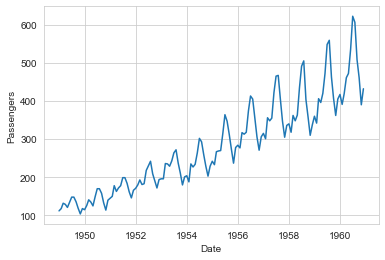

In [ ]:
#plt.plot(ts_data)
#plt.xlabel('Date')
#plt.ylabel('Passengers')
#plt.show()

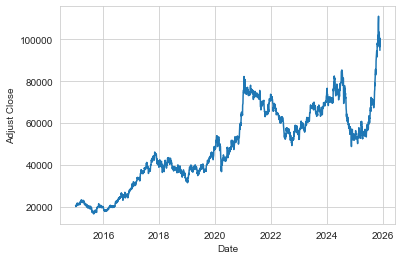

In [ ]:
#plt.plot(ss_data)
#plt.xlabel('Date')
#plt.ylabel('Adjust Close')
#plt.show()

> ### 1-2. 시계열 분석과 목적  

- 주 목표: 미래 데이터 예측  
- 단, 시계열 분석은 **데이터 구조 파악, 예측, 이상치 탐지**를 포함하는 개념이다.  

-> 기초 통계분석, 이동평균, 지수평활, ARIMA, 회귀분석, 전이함수모형, 신경망 기반 등 다양한 기법들을 데이터에 따라 선택하고 조합하여 분석

> ### 1-3. 시계열 데이터의 특징

1. 시간 의존성  
    - 시간 순서에 따라 관측 -> 데이터의 순서를 바꾸면 의미가 달라진다  
    - 과거의 값이 현재 값에 영향을 끼친다  
    - 시점 간 상관관계가 있다

2. 계절성 & 추세  
    - 계절성: 일정 주기에 따라 반복되는 데이터의 변동 -> 패턴 고려한 예측 모델링 가능  
    - 추세: 시간의 흐름에 따라 나타나는 장기적인 증가, 감소 경향  

3. 자기상관성  
    - 한 시점의 값이 과거의 값과 통계적으로 관련  
    - 포인트 1 -> 포인트 2에 영향 -> 포인트 2가 포인트 3에 영향 ...  

    - 자기상관성은 '회귀분석의 기본가정(오차항 간에 상관관계가 없어야 한다)'에 어긋나게 되므로, 일반적인 회귀분석으로 분석하면 안된다!  
    -> 정상성 및 추세 확인 후  
    -> 추세를 제거해아야 함(차분, 추세 회귀 후 잔차)  

    - 일반적인 회귀모델로는 예측이 어렵고 신뢰도가 낮아지므로, 시계열 전용 모델(AR, MA, ARIMA)을 적용하다.

> ### 1-4. 시계열 데이터의 분석요인  

- 추세 (Trend, T)
데이터가 장기적으로 증가하거나 감소하는 경향  
예: 인구 증가, 지구 온난화에 따른 기온 상승

- 계절성 (Seasonality, S)
1년 미만의 일정한 주기로 반복되는 일정한 패턴  
예: 여름철 아이스크림 판매량 증가, 주말의 쇼핑몰 매출 증가, 장마철로 인해 여름에는 야간 위성 조도가 감소  

- 순환 (Cycle, C)
계절성보다 주기가 뚜렷하지 않고, 더 길고 불규칙하게 반복되는 장기적인 상승과 하락의 반복  
예: 경기 호황과 불황의 사이클  
    - 고정된 주기를 가지고 반복 -> 계절성  
    - 주기가 불규칙하거나 장기적, 경제 요인처럼 외부 요인이 강함, 추세와의 구분이 모호 -> 순환성  
        데이터 자체가 순환 주기보다 크지 않을 때는 순환요인을 무시하거나, 추세요인에 포함하기도 함  

- 불규칙성/잔차 (Residual/Noise, R)
위의 세 가지 요인으로 설명되지 않는 무작위한 변동  
노이즈, 우연한 사건, 일시적 변동, 이상치  
예: 돌발적인 자연재해, 팬데믹, 파업 등으로 인한 단기적 변화  

> ### 1-5. 시계열 분석의 워크플로우  

1. **데이터 전처리** - 결측치 보간, 이상치 제거, 요소분해
2. **정상성 판단**
3. **모델링 및 예측**

> ## 2. 시계열 데이터 전처리  

> ### 2-1. 이상치/결측치 처리  

- 결측치: 특정 시점에서 값이 측정되지 않았거나 누락  
결측으로 인해 추세/계절성이 왜곡될 수 있으므로 적절한 대치와 보간이 필요  

- 이상치: 측정된 값이 일반적이지 않은 경우  
    측정 오류 or 실제로 특이한 이벤트 값  
    -> 신호의 중요한 의미일 수 있으므로 신중한 접근 필요  
> 예시: 제가 다른 수업에서 월별 위성사진 야간 조도 데이터를 수집하는데,  
우리나라 데이터에서 여름 시기마다 급격히 줄어드는 것을 발견했습니다.  
여름마다 단체로 전기아끼기를 하는것은 아닐테고.. 장마철 비, 구름 때문에 잘 안 잡힌 것입니다.  

- 전처리 프로세스  
    1. 데이터 EDA  
    2. 결측치 확인 -> 처리(삭제/대치/보간/이동평균 대치 등)  
    3. 이상치 탐지 -> 처리(삭제/대치/보간/이동평균 대치 등)  
    4. 요소 분해

> 결측치 처리 방법  

- 삭제  
결측 포인트 자체를 삭제  
연속성이 깨지고 분석 구간이 짧아짐

- 단순 대치  
평균/중앙값/최빈값 등으로 대치  
패턴이 왜곡될 수 있음

- 보간법  
    - 주어진 데이터 포인트의 값을 활용하여, 두 개 이상의 데이터 포인트 사이의 누락된 값을 추정하는 수학적 기법  
    예: 10 NA NA 40 50 으로 있을 때, NA 부분을 20, 30 이라는 선형관계로 예측하여 채우는 것  
    - 종류  
        선형 보간법: 데이터 포인트를 지나는 직선 방정식을 연결하여 그 사이 값을 추정  
        -> 빠르고 직관적이나, 비선형이거나 급격한 변화가 있다면 신뢰성이 낮다.  

        다항식 보간법: 주어진 데이터 포인트를 모두 통과하는 다항식을 찾고, 이를 통해 결측 보간  
        -> 비선형 관계에 강하지만, 고차 다항식은 과적합 위험이 있고 계산량이 많다.  

        스플라인 보간법: 구간별로 다항식을 사용하며 각 구간별로 보간 수행  
        각 구간마다 3차 다항식을 사용하는 **큐빅 스플라인**이 대표적  
        -> 부드럽고 연속적인 보간 제공, 과적합이 적고 비선형 관계에 강함  

        조각별 상수 보간법: 계단 형식으로, 데이터를 구간으로 나눈 후 각각의 구간에서 동일한 값을 유지하면서 결측을 보간  
        forward fill: 직전 관측치 값으로 대체  
        backward fill: 직후 관측치 값으로 대체  
        최근접 이웃 보간: 결측치 위치에서 거리상 가장 가까운 값을 선택하여 대체  
        -> 계산량이 적으나, 세밀한 추정에 약함. 데이터가 급격히 변하는 영역에서 정확도가 낮음  

> 이상치 탐지 및 처리  

- 탐지 방법 종류  
    IQR: 박스 플롯에서 점으로 찍히는 부분  
    -> 주기성이 없거나 안정적 구간에서 이상치를 탐지  
    -> 빠르고 해석이 쉬우나, 추세가 계절성이 강하고, 분포가 비정상적인 데이터에는 약함.

    Z-score: $Z=(x−μ)/σ$  
    특정 값이 평균으로부터 몇 표준편차 만큼 떨어져 있는지  
    보통 Z의 절댓값이 3이상이면 이상치로 판단  
    -> 빠르고 해석이 쉬우나, 정규분포 가정에 민감  
    -> 비정상 시계열(평균과 표준편차가 시간에 따라 변함)에서는 안정적인 임계치 설정이 어려운 문제  

    STL 분해: $X_t = T_t + S_t + R_t$  
    시계열을 추세, 계절성, 잔차로 분해 -> 잔차가 임계값을 추가하면 이상치라고 판단  
    -> 계절성, 추세가 뚜렷한 데이터에 적합  
    -> 잔차에 Z-score, IQR등을 추가 적용 가능  
    -> LOESS 회귀라는 계산량이 많은 방법을 기반으로 함  
    -> 매우 긴 시계열에는 파라미터 튜닝이 필요  

- 이상치 탐지 모델  
    분류 및 회귀 트리(CART)  
    스무고개처럼 데이터를 "예/아니오"로 계속 나누어 정답(예측값)을 찾고, 모델이 예측한 값과 실제 값의 차이(오차)가 너무 크면, 일반적인 규칙을 벗어난 이상치로 봄  
    - 시계열 적용: 과거 구간 값 입력 -> 다음 시점 값 예측 -> 예측오차(예측값과 실제값의 차이) 기반으로 이상치 판단  
    - 장점: 비선형 관계에 강함, 다변량에도 적용 가능  
    - 단점: 노이즈가 많다면, 과적합 위험. 트리의 깊이에 따라 탐지 민감도가 달라짐  

    클러스터링 사용  
    K-means, DBSCAN, Isolation Forest 등 클러스터링 기법을 사용 -> 정상 구간이 모인 클러스터에서 멀리 떨어진 '이상치 클러스터'를 탐지  
    - 시계열 적용: 시계열의 특징 추출 -> 각 시점(구간)을 벡터로 표현 -> 클러스터링 -> 중심으로부터 거리나 군집 밀도를 기준으로 이상치 판단  
    - 장점: 데이터 패턴이 복잡하거나 다변량일 때 유용  
        사전 분포 가정이 불필요  
    - 단점: 하이퍼파라미터에 민감  
        시계열의 순서 정보는 반영되지 않음  

    오토 인코더(AE)  
    정상 데이터에 대한 특징 학습, 그 모델에 데이터를 입력했을 때 재구성한 결과와 학습된 정상 특징과 차이점 비교 -> 이상치 여부 판단  
    - 잠재공간에 압축했다가 복원했을 때, 정상패턴은 잘 복원/이상패턴은 복원오차가 커짐  
    - 시계열 적용: LSTM AE 사용(시간적 의존성까지 학습) -> sliding window로 시계열 구간을 학습, 테스트 구간의 복원오차로 이상 탐지(복원오차가 임계값 이상이면 이상치로 판단)  
    - 장점: 딥러닝답게 비선형패턴에 강함, 다변량 시계열에 강함  
    - 단점: 딥러닝답게 학습 데이터 자체가 많아야 함. 모델 해석이 어렵고, 파라미터 튜닝이 까다로움  

- 이상치 처리 방법: 결측치와 같은 방법으로 처리  

> 평활화 (Smoothing)  
시계열 데이터에서 노이즈를 줄이고, 흐름이나 추세를 더 명확히 파악하기 위해 데이터를 부드럽게 만드는 기술  

뾰족뾰족한 시계열 선을 부드럽게 만듦

- 이동평균(MA)  
N=moving window의 길이로, N만큼의 구간을 잘라서 평균을 구하고, 옆으로 한 칸씩 이동하면서 계속 구하는 방식  
    - N이 클 때 -> 그래프가 매우 부드러워짐. 단 최근 변화에 둔감  
    - N이 작을 때 -> 그래프가 여전히 뾰족뾰족하지만, 최근 변화를 잘 반영함

- 이동평균의 세 가지 종류  
    1. 단순 이동평균(SMA)
    만약 5일치의 평균이라면, 5일 전 데이터나 오늘 데이터나 똑같이 1/5씩 반영
    
    2. 가중 이동평균(WMA)
    똑같은 5일치라도, 어제 값에는 가중치를 많이 주고 5일 전 값에는 적게 주는 방식

    3. 지수 이동평균 (EMA)
    WMA처럼 최근 데이터에 가중치를 주면서도, 과거의 모든 데이터를 아예 잊지는 않고 (오래된 데이터의 영향력이 지수적으로 줄어들게 하면서) 아주 조금씩이라도 반영  
    - 가장 많이 쓰이는 방법이다.(특히 주식 차트에서) 최근 변화에 민감하면서도 전체 흐름을 놓치지 않기 때문!

- 이동평균은 대표적인 평활화 기법으로, 정식 결측치나 이상치 처리 기법은 아니지만,  
결측치(이상치) 주변 n개의 값을 이동평균 계산 후, 그 값으로 결측치(이상치)를 대치(임퓨테이션)하는 식으로 결측치/이상치 처리에 활용되기도 한다.

> ### 2-2. 요소분해 (Decomposition/시계열 분해)  
시계열 데이터를 [추세성, 계절성, 순환성, 불규칙성]으로 분해하는 과정!

$$Y_t = f(T_t, S_t, C_t, R_t)$$

-> $T_t$ : 추세성분 (시점 t에서의 추세요소)  
-> $S_t$ : 계절성분 (시점 t에서의 계절요소)  
-> $C_t$ : 순환성분 (시점 t에서의 순환요소)  
(단, 순환성은 보통 장기간에서만 고려되므로, $C_t=0$으로 보통 설정함.)  
-> $R_t$ : 불규칙성분 (시점 t에서의 불규칙요소)  

- 요소분해를 하는 이유 -> 각각의 패턴을 명확히 파악 -> 이후 예측, 이상 탐지 등의 분석작업을 정교하게 수행 가능  

> 가법 모델  
$$y_t = T_t + S_t + R_t$$
- 시계열 관측값은 변동요인들의 가법(+)으로 설명될 수 있다고 가정  
- 각 변동 요인들이 독립적으로 더해지고, 모든 요소의 영향이 일정  
- 시계열 전체에서 계절성의 진폭이 일정할 때 적합!  
    예시: 매년 여름 매출이 정확히 100만 원씩 증가하는 경우

> 승법 모델  

$$y_t = T_t * S_t * R_t$$

$$log(y_t) = log(T_t) + log(S_t) +log(R_t)$$
(로그 변환하면 가법 형태가 됨)  

- 시계열 관측값은 변동요인들의 승법(*)으로 설명될 수 있다고 가정  
- 추세가 커질수록, 계절성이나 불규칙성의 효과(진폭)도 그에 비례해서 커짐(실제 데이터는 이쪽에 더 가깝)  
- 진폭이 시간에 따라 달라질 때에 적합하다  
    예시: 매년 여름 매출이 평소보다 1.5배(50%) 증가하는 경우(매출 규모가 커지면 증가액도 커짐)

> STL 분해와 계절성 분해는 어떻게 다른가요?

|  | STL | seasonal decompose |
| --- | --- | --- |
| 요소분해 방식 | LOESS(더 복잡한 계산) | 이동평균 |
| 계절성 처리 | 시간에 따라 **변하는  계절성** 반영 | **고정된 계절성**만 반영 |
| 이상치 영향 | 적게 받음(robust 옵션 가능) | 많이 받음 |
| 데이터 손실 | 발생 X | 발생 (이동평균 계산 구간만큼 앞뒤 데이터 손실) |

<br>

> 시계열 분해는 본격적인 예측 모델링(AR, MA, ARIMA 등)으로 넘어가기 전, 데이터를 이해하고 전처리 방향을 잡는 데 필수적인 과정!

> ## 3. 정상성 판단  

> ### 3-1.  정상성이란?  

'시간에 상관없이' 일정한 성질을 띠고 있는가?  
즉, 시계열 데이터의 평균, 분산과 같은 통계적 특성이, 시간에 따라 일정한 수준으로 유지되고 있으면 정상성이 있는 것  

    - 정상성을 띠는 시계열 데이터: 정상 시계열  
    - 정상성을 띠지 않는 시계열 데이터: 비정상 시계열  

-> 정상 시계열은 **예측 및 모델링에 적합**하고, 대부분의 통계 기법에 적용 가능  

> ### 3-2. 강한 정상성과 약한 정상성  

1. 강한 정상성: 모든 적률(평균, 분산, 왜도, 첨도)이 시간과 무관하게 일정함  
- 적률?  

| **적률 순서** | **의미** | **수식 형태** | **예시** |
| --- | --- | --- | --- |
| 1차 적률 | 평균 | E[X] | 중심 위치 |
| 2차 적률 | 분산 | Var(X) = E[(X - \mu)^2] | 퍼짐 정도 |
| 3차 적률 | 왜도 | 비대칭성 | 왼쪽/오른쪽 치우침 |
| 4차 적률 | 첨도 | 뾰족함 정도 | 정규 vs 뾰족한 분포 |

- 확률 분포 자체가 언제나 같아야 하는 것  
    예시: 주사위를 던지는 것의 분포는 '언제인가'와 상관 없음  
    -> 현실에는 거의 없는 분포라고 볼 수 있다.  

2. 약한 정상성: 완화된 정상성 개념으로, 아래 세 가지 조건을 만족하면 보통 정상성이 있다고 부름  
    1. 평균이 모든 시점에 대해 일정함  
    2. 분산이 모든 시점에 대해 일정함  
    3. **자기공분산은 시점에 의존하지 않고, 단지 시차에만 의존함**

    - 자기공분산  
    일반적으로 말하는 공분산(Covariance): 서로 다른 두 변수가 함께 움직이는 정도  
    자기공분산(Auto covariance): 한 시계열의 다른 시점들 간의 관계  
    예: 자기공분산이 양수: 온도처럼 **관성**이 있는 데이터 (따뜻한 날은 다음 날도 따뜻한 편)  
    자기공분산이 음수: 냉장고 설정 온도 유지 시스템처럼 진동신호가 있는 데이터는 되돌림(force of correlation)이 있어 과거 값과 현재 값이 반대로 움직이는 경향이 있음  
    자기공분산이 0: 백색잡음처럼 기억이 없는 랜덤 시계열  

    - 3번(시차에만 의존) 뭐에요?  
    자기공분산의 변화가 시간의 차이에만 의존하고, 시점(변화가 발생한 타이밍)에는 의존하지 않는다는 뜻  


> ### 3-3. 시각적으로 정상성 파악하기  

1. 추세가 있는가?  
-> 추세가 있다면, 관측 시점에 따라 평균이 변한다 -> 비정상성!  

2. 계절성이 있는가?  
-> 고정된 주기의 계절성이 있으면, 특정 시기마다 튀는 것이 드러난다 -> 비정상성!

3. 분산이 증가하거나 감소하는가?  
-> 분산이 일정하지 않으면, 갑자기 변화폭이 뛰는 것이 드러난다 -> 비정상성!

> ### 3-4. 검정을 통해 정상성 판단하기  

대부분의 정상성 검정은 단위근(unit-root) 검정  

> 시계열적 의미의 단위근은 수학적 의미와 조금 다른데,  
요약하자면 "과거의 충격이 영원히 사라지지 않고 현재에 100% 반영되는 상태"이다.

$$오늘 = (\alpha \times 어제) + 새로운충격$$

이 때 알파가 1이면 단위근을 가졌다고 표현

(AR(1) 모형에서의 알파를 확인할 때)
- |알파|<1: 정상  
슬라임처럼 꾹 눌러도, 다시 원래 모습으로 돌아오는 성질을 가짐 

- 알파=1: 비정상  
고체 물건을 밀면, 그 자리에 그대로 있음(밀기 전 자리로 돌아오면 괴담이 된다)

- |알파|>1: 발산  
하울링 현상처럼, 소리가 점점 커지면서 찢어지는 소리가 됨. ('오늘'이 지나치게 커짐)

- 알파=0: 완전한 백색잡음

- 왜 알파=1이 비정상성일까?  
    1. 평균이 없다. 충격을 받을 때마다 기준점이 계속 바뀜  
    2. 분산이 무한대로 커짐, 시간이 지날수록 변동폭이 계속 커져서 불확실성이 커짐  
    3. 랜덤 워크: 과거 충격이 누적되어 시계열 전체에 영향을 줌  
    (내리막길에서 실수로 발을 삐끗하고 계속 내리막길로 내려가는 것과 비슷)  
    -> 종합하자면 알파가 1이면 정상적인 예측을 할 수 없기 때문  


> 그렇다면 AR(1)에서 알파가 1이면 비정상성인가요?  

가장 단순한 모델(AR1)에서는 맞지만, 현실 데이터는 더 복잡  

- 단순한 경우 (AR1): $y_t = \alpha y_{t-1} + e_t$
이때는 $\alpha$가 곧 단위근 판별 기준이 맞다  
- 복잡한 경우 (AR2 이상): $y_t = \alpha_1 y_{t-1} + \alpha_2 y_{t-2} + ...$
과거의 데이터가 어제, 엊그제, 3일 전... 복합적으로 영향을 주고, 이때는 단순히 계수 하나만 보고 판단할 수 없다.

> 단위근 검정의 대표 방법  

1. ADF  
    - 단위근의 존재 여부를 통해 정상성 판단  
    - 귀무가설(H₀): 시계열에 단위근이 존재한다 → 비정상 시계열  
    - 대립가설(H₁): 시계열에 단위근이 존재하지 않는다 → 정상 시계열  

    -> p-value가 유의수준보다 작으면 귀무가설 기각 → 정상 시계열

2. KPSS  
    - ADF와 귀무가설이 반대  
    - 귀무가설(H₀): 시계열에 단위근이 존재하지 않는다 → 정상 시계열
    - 대립가설(H₁): 시계열에 단위근이 존재한다 → 비정상 시계열  

    -> p-value가 유의수준보다 작으면 귀무가설 기각 → 비정상 시계열


> 잉? 두 검정은 항상 반대되는거 아닌가요?  

- 확정적 추세 (Deterministic Trend): 시간이 지나면 규칙적으로 오르는 것  
잡음은 있지만, 멀리서 보면 선형적인 것으로 보임  
ADF: 값이 계속 커지네? 평균이 안 일정해! 이거 비정상이야! (추세를 랜덤위크로 판단한 경우, ADF와 KPSS의 판단이 상충)

- 확률적 추세 (Stochastic Trend): 랜덤 워크의 성격  
예측 불가능하고, 과거의 충격이 계속 누적  
ADF: 이거 랜덤워크네! 확실한 비정상이야! (정답, ADF와 KPSS의 판단이 같음)

- 해결책  
ADF(Trend) 모델: ADF가 확정적 추세를 보고 "비정상!"이라고 소리치는 걸 막기 위해, ADF 모델에 확정적 추세를 설명하는 항인 추세항($\beta_t$)를 추가 한 것  

    다만, 항상 추세항을 넣을 수는 없는 이유가, 불필요한 항이 들어가 ADF의 검정력이 약해질 수 있기 때문이다. (확정적 추세를 미리 확인하고 넣는 것이 좋다.)  
    그리고, 추세항을 추가해도 여전히 검정력이 낮을 수 있다.  

    - KPSS(Trend) 모델도 있다  
    시계열을 '추세+정상성+누적랜덤쇼크' 구조로 분해한 식을 적용 -> 추세를 반영하여 '정상이다' 라는 결과를 얻을 수 있음

> ### 3-5. 정상성 확보를 위한 방법들  

대다수의 시계열 데이터는 비정상성이다. (추세가 있거나, 계절성이 있거나, 분산의 변동이 있다.)  

-> 추세를 제거 or 계절성을 제거 or 분산을 일정하게 만들기  
-> 정상성으로 바꿔주기!!

1. 추세 제거: 차분  
예: 우상향하고 스파이크가 있는 주식 데이터를 직선 위에 펴서, 스파이크만 나타나게 하는 것   
한 시점의 값과 그 이전 시점의 값을 차분하여 변화량을 계산 -> 시계열 데이터의 정상성을 확보하거나 비정상적인 변동을 제거
- 누적된 값들을 빼줌으로써 정상적인 시계열을 얻을 수 있음  
- n차 차분: 1차 차분만으로 정상성이 확보되지 않을 때 수행  
- 역차분: 차분한 데이터를 해석하기 위해서, 원래의 단위로 돌려놓는 과정  
    차분 데이터에 이전 시점 값을 더해서 원래 값으로 복원  

2. 계절성 제거: 계절 차분  
    - t시점의 y값에서 t-m시점의 y값을 빼는 것 (m는 주기의 길이)  
    - 계절성을 차분으로 제거  
    - 전: 자기공분산(ACF)이 파도처럼 점점 줄거나 느는 형태 -> 후: 자기공분산이 백색잡음과 비슷한 형태로 나타나게 됨  
    - 계절성 패턴이 강하게 나타나면, 계절성 차분을 먼저 진행하는 것이 좋음.  
    (이런 경우에 일반 차분을 먼저 했다면, 여전히 계절성이 나타날 수 있음)

3. 분산 안정화: 로그 변환, 박스-콕스 변환  

- 로그 변환
    - 변화의 폭을 로그로 줄여서, 분산의 정상성을 확보하는 방법  
    - 한계: 로그는 음수나 0을 처리할 수 없음, 분산 변화가 비선형적/복잡할 때 약함.  

- 박스-콕스 변환  
    - 로그 변환의 일반화된 형태  
    $$Y_t^{(\lambda)} =\begin{cases}\frac{Y_t^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\\log(Y_t), & \text{if } \lambda = 0\end{cases}$$

    - $\lambda$ (변환 파라미터): 변환 강도를 조정하는 매개 변수  
    - 람다 $\lambda$ 는 어떻게 구하나요?  
    -> 최대 우도법을 통해 추정!  
        a. 람다를 조금씩 바꿔가면서 데이터에 적용  
        b. 어떤 람다를 쓸 때, 데이터가 정규분포에 얼마나 가까운지를 점수로 매김(로그 우도)  
        c. b가 가장 높은 람다를 선택  

    - 한계: 역시 음수나 0을 처리할 수 없음 -> 데이터의 최소값이 양수가 되도록 어떤 값을 더하는 Shift를 주는 식으로 해결하기도 함  